In [23]:
import os
import pandas as pd

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "datasets/steel_industry_data.csv")
data = pd.read_csv(path_file, header=0)

In [24]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [25]:
data.rename(columns = {'date': 'Data',
                       'Usage_kWh': 'Consumo_kWh',
                       'Lagging_Current_Reactive.Power_kVarh': 'Potencia_Reativa_Atrasada_kVarh',
                       'Leading_Current_Reactive_Power_kVarh': 'Potencia_Reativa_Adiantada_kVarh',
                       ' CO2(tco2)': 'CO2(toneladas)',
                       'Lagging_Current_Power_Factor': 'Fator_Potencia_Atrasada',
                       'Leading_Current_Power_Factor': 'Fator_Potencia_Adiantada',
                       'NSM': 'Segundo_Desde_MeiaNoite',
                       'WeekStatus': 'Status_Semana',
                       'Day_of_week': 'Dia_da_Semana',
                       'Load_Type': 'Tipo_de_Carga'}, inplace=True)

In [26]:
data.isnull().sum()

Data                                0
Consumo_kWh                         0
Potencia_Reativa_Atrasada_kVarh     0
Potencia_Reativa_Adiantada_kVarh    0
CO2(tCO2)                           0
Fator_Potencia_Atrasada             0
Fator_Potencia_Adiantada            0
Segundo_Desde_MeiaNoite             0
Status_Semana                       0
Dia_da_Semana                       0
Tipo_de_Carga                       0
dtype: int64

In [27]:
data_red = data.iloc[:, 1:8]
data_red

,Consumo_kWh,Potencia_Reativa_Atrasada_kVarh,Potencia_Reativa_Adiantada_kVarh,CO2(tCO2),Fator_Potencia_Atrasada,Fator_Potencia_Adiantada,Segundo_Desde_MeiaNoite
0,3.17,2.95,0.00,0.0,73.21,100.00,900
1,4.00,4.46,0.00,0.0,66.77,100.00,1800
2,3.24,3.28,0.00,0.0,70.28,100.00,2700
3,3.31,3.56,0.00,0.0,68.09,100.00,3600
4,3.82,4.50,0.00,0.0,64.72,100.00,4500
...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500


<function matplotlib.pyplot.show(close=None, block=None)>

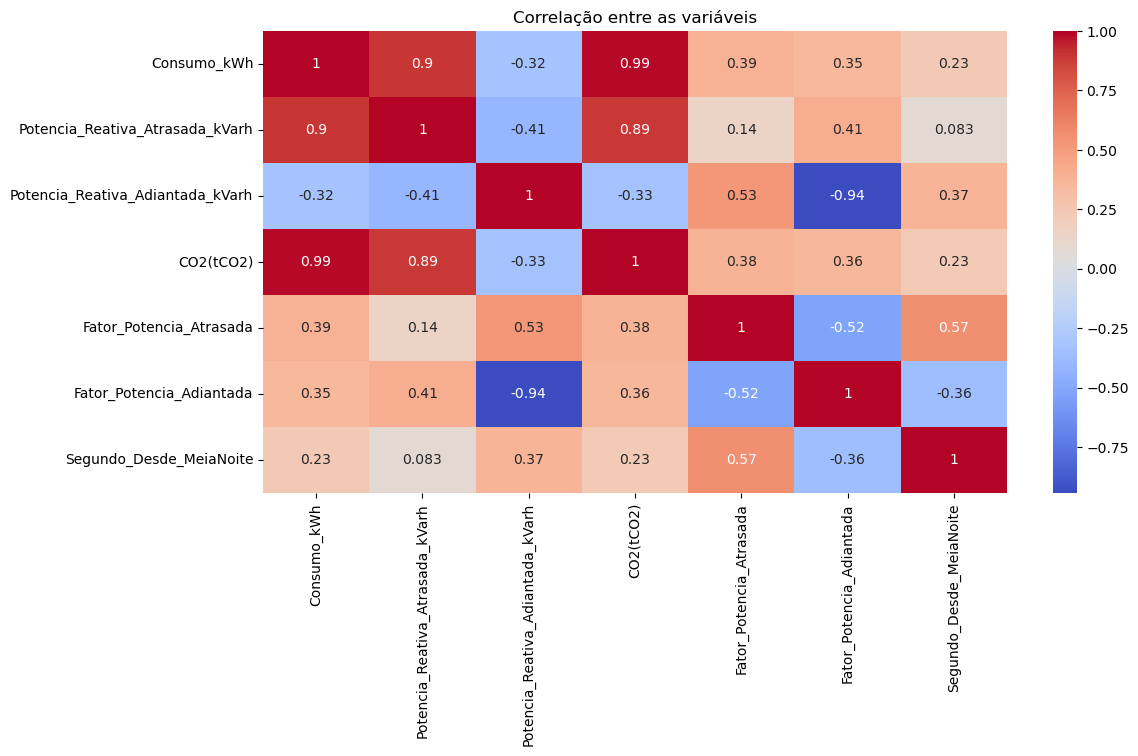

In [28]:
# Correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(data_red.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlação entre as variáveis')
plt.show

In [29]:
# Splitting the data
X = data_red.drop('Consumo_kWh', axis=1)
X

,Potencia_Reativa_Atrasada_kVarh,Potencia_Reativa_Adiantada_kVarh,CO2(tCO2),Fator_Potencia_Atrasada,Fator_Potencia_Adiantada,Segundo_Desde_MeiaNoite
0,2.95,0.00,0.0,73.21,100.00,900
1,4.46,0.00,0.0,66.77,100.00,1800
2,3.28,0.00,0.0,70.28,100.00,2700
3,3.56,0.00,0.0,68.09,100.00,3600
4,4.50,0.00,0.0,64.72,100.00,4500
...,...,...,...,...,...,...
35035,4.86,0.00,0.0,62.10,100.00,82800
35036,3.74,0.00,0.0,70.71,100.00,83700
35037,3.17,0.07,0.0,76.62,99.98,84600
35038,3.06,0.11,0.0,77.72,99.96,85500


In [30]:
# Target variable
y = data_red['Consumo_kWh']
y

0        3.17
1        4.00
2        3.24
3        3.31
4        3.82
         ... 
35035    3.85
35036    3.74
35037    3.78
35038    3.78
35039    3.67
Name: Consumo_kWh, Length: 35040, dtype: float64

In [31]:
# Train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
# Transforming y values into binary values from the median
import numpy as np

threshold = y.median()
y_train_bin = np.where(y_train > threshold, 1, 0)

In [33]:
# Logistic Regression model training
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train_bin)

LogisticRegression(max_iter=1000)

In [34]:
# Predictions
y_pred = log_model.predict(X_test)

In [35]:
# Accuracy test
from sklearn.metrics import accuracy_score

y_test_bin = np.where(y_test > threshold, 1, 0)
accuracy = accuracy_score(y_test_bin, y_pred)
print('Acurácia (Regressão Logística):', accuracy)

Acurácia (Regressão Logística): 0.9550513698630136


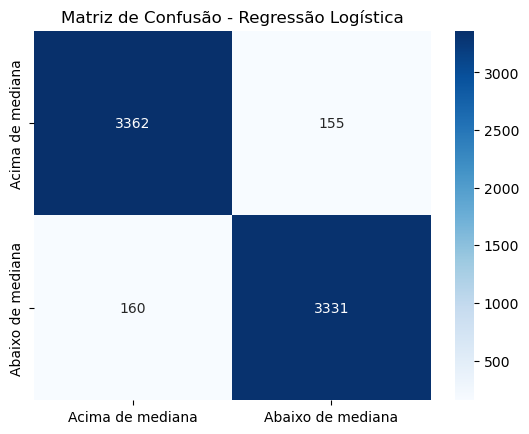

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_bin, y_pred)
class_labels = ['Acima de mediana', 'Abaixo de mediana']
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()